<a href="https://colab.research.google.com/github/Yoshida-2002/thesis/blob/main/ESM_as_EP_omo_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning
%ls
%pwd

/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning
 data/  'ESM as EP omo on colab'   lightning_logs/   plot_figures/   result_log/   src/   weights/


'/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning'

In [3]:
!pip install transformers
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 11.3 MB/s eta 0:00:00


# pathを辞書にまとめて管理する

In [4]:
# path_dict = {

#     # 生データのパス
#     'raw_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/train2.tsv',
#     'raw_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/test2.tsv',
#     'raw_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/row/tsv/val2.tsv',

#     # 欠損値処理を行った後のデータのパス
#     'missing_value_processed_train_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_train2.tsv',
#     'missing_value_processed_test_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_test2.tsv',
#     'missing_value_processed_val_data' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/missing_value_processed/pocessed_val2.tsv',

#     # 欠損値処理を行った後、さらなる整形を行ったデータ
#     'input_for_lightning_model_train_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_train2.tsv',
#     'input_for_lightning_model_test_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_test2.tsv',
#     'input_for_lightning_model_val_base' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/base/input_val2.tsv',

#     # 集合に分割した後のデータ (main)
#     'main_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/true_set2.tsv',
#     'main_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/train/false_set2.tsv',
#     'main_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/true_set2.tsv',
#     'main_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/test/false_set2.tsv',
#     'main_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/true_set2.tsv',
#     'main_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/main/val/false_set2.tsv',

#     # 集合に分割した後のデータ (toy)
#     'toy_input_for_lightning_model_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/true_set2.tsv',
#     'toy_input_for_lightning_model_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/train/false_set2.tsv',
#     'toy_input_for_lightning_model_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/true_set2.tsv',
#     'toy_input_for_lightning_model_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/test/false_set2.tsv',
#     'toy_input_for_lightning_model_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/true_set2.tsv',
#     'toy_input_for_lightning_model_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/input_for_lightning_model/set/toy/val/false_set2.tsv',

#     # モデルを保存するPath
#     'saved_model_path' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models',
#     'TensorBoardLogger': 'lightning_logs',

#     # 拡張したデータの保存場所(main)
#     'main_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/true_set2.tsv',
#     'main_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/false_set2.tsv',
#     'main_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/true_set2.tsv',
#     'main_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/false_set2.tsv',
#     'main_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/true_set2.tsv',
#     'main_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/false_set2.tsv',

#     # 拡張したデータの保存場所(main)
#     'toy_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/true_set2.tsv',
#     'toy_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/false_set2.tsv',
#     'toy_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/true_set2.tsv',
#     'toy_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/false_set2.tsv',
#     'toy_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/true_set2.tsv',
#     'toy_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/false_set2.tsv',

#   }


In [5]:
path_dict = {
    'saved_model_path' :  '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/src/models',

    # モデルを保存するPath
    'saved_model_path' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models',
    'TensorBoardLogger': 'lightning_logs',

    # 拡張したデータの保存場所(main)
    'main_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/true_set2.tsv',
    'main_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/train/false_set2.tsv',
    'main_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/true_set2.tsv',
    'main_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/test/false_set2.tsv',
    'main_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/true_set2.tsv',
    'main_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/main/val/false_set2.tsv',

    # 拡張したデータの保存場所(main)
    'toy_extended_train_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/true_set2.tsv',
    'toy_extended_train_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/train/false_set2.tsv',
    'toy_extended_test_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/true_set2.tsv',
    'toy_extended_test_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/test/false_set2.tsv',
    'toy_extended_val_data_true' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/true_set2.tsv',
    'toy_extended_val_data_false' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/toy/val/false_set2.tsv',


}

# ModelConfigを定義する
- colab上では辞書
- モジュール分けするときはjsonに

## BERT/RoBERTa

In [6]:
# bert-base
bert_base_config = {
    'MODEL_NAME' : 'bert-base-uncased',
    'TOKENIZER_NAME' : 'bert-base-uncased',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 4,
    'TEST_BATCH_SIZE' : 4,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],

    # 'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH_TRUE' : path_dict['toy_extended_train_data_true'],
    'VALIDATION_DATA_PATH_TRUE' : path_dict['toy_extended_val_data_true'],
    'TEST_DATA_PATH_TRUE' : path_dict['toy_extended_test_data_true'],

    'TRAINING_DATA_PATH_FALSE' : path_dict['toy_extended_train_data_false'],
    'VALIDATION_DATA_PATH_FALSE' : path_dict['toy_extended_val_data_false'],
    'TEST_DATA_PATH_FALSE' : path_dict['toy_extended_test_data_false'],

    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    # 'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'ESM',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 'bert-base-uncased',
    'MODEL_FOLDER' : ['bert','base-uncased']
}

# roberta-base
roberta_base_config = {
    'MODEL_NAME' : 'roberta-base',
    'TOKENIZER_NAME' : 'roberta-base',
    'MAX_LENGTH' : 512,
    'TRAINING_BATCH_SIZE' : 16,
    'VALIDATION_BATCH_SIZE' : 16,
    'TEST_BATCH_SIZE' : 1,
    'TRAINING_EPOCHS' : 2,
    'SAVE_TOP_K' : 1,
    'SAVED_MODEL_PATH' : path_dict['saved_model_path'],
    # 'CSV_LOGGER_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/weights/csv_log',
    'TRAINING_DATA_PATH_TRUE' : path_dict['toy_extended_train_data_true'],
    'VALIDATION_DATA_PATH_TRUE' : path_dict['toy_extended_val_data_true'],
    'TEST_DATA_PATH_TRUE' : path_dict['toy_extended_test_data_true'],

    'TRAINING_DATA_PATH_FALSE' : path_dict['toy_extended_train_data_false'],
    'VALIDATION_DATA_PATH_FALSE' : path_dict['toy_extended_val_data_false'],
    'TEST_DATA_PATH_FALSE' : path_dict['toy_extended_test_data_false'],

    'LR' : 7e-5,
    'RANDOM_SEED' : 42,
    # 'CROSS_ENTROPY_IGNORE_INDEX' : -100,
    'COMPONENT_NAME' : 'ESM',
    'PROMPT_COMPONENTS' : ['statement', 'metadata', 'justification'],
    'TensorBoardLogger_NAME' : 'roberta-base',
    'MODEL_FOLDER' : ['roberta', 'base']
}

## Model_Dict

In [7]:
Model_Config_Dict = {
    'bert_base_config' : bert_base_config,
    'roberta_base_config' : roberta_base_config,
}

# データの読み込み書き込み

## data_reader.py

In [8]:
# -*- coding: utf-8 -*-
# ========================================================
"""data_reader module is written for read files"""
# ========================================================


# ========================================================
# Imports
# ========================================================

import pandas as pd
import numpy as np


def read_csv(path: str) -> pd.DataFrame:
    """

    :param path:
    :return:
    """
    return pd.read_csv(path)

def read_tsv(path: str) -> pd.DataFrame:
    """

    :param path:
    :return:
    """
    return pd.read_csv(path, sep="\t", header=None)


def read_npy(path: str) -> np.ndarray:
    """
    load a list of numpy elements into memory
    :param path:
    :return:
    """
    return np.load(path, allow_pickle=True)


def read_excel(path:str) -> pd.DataFrame:
    """
    :param path: where to load data from
    :return: pd.DataFrame
    """
    return pd.read_excel(path, engine="openpyxl")



## data_writer.py

In [9]:
# -*- coding: utf-8 -*-
# ========================================================
"""data_writer module is written for write data in files"""
# ========================================================


# ========================================================
# Imports
# ========================================================
import pandas as pd
import numpy as np


def write_npy(path: str, data: list) -> None:
    """
    save a list of numpy elements into disk
    :param path:
    :param data:
    :return:
    """
    return np.save(path, data, allow_pickle=True)

def write_dataframe_in_tsv(data: pd.DataFrame, path: str) -> None:

  """
  save pd.Dataframe in tsv file
  :param path:
  :param data:

  """

  data.to_csv(path, sep='\t', index=False, header=False)



# dataset_separator_on_labels

In [10]:
def dataset_separator_on_labels(data: pd.DataFrame):

  true_set = pd.DataFrame()
  false_set = pd.DataFrame()
  total_len = len(data)

  for i in range(len(data)):

    data_row = data.iloc[i]
   # print(data_row)

    if data_row[1] == "true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "half-true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "mostly-true":
        true_set = true_set.append(data_row, ignore_index=True)
    elif data_row[1] == "false":
        false_set = false_set.append(data_row, ignore_index=True)
    elif data_row[1] == "barely-true":
        false_set = false_set.append(data_row, ignore_index=True)
    elif data_row[1] == "pants-fire":
        false_set = false_set.append(data_row, ignore_index=True)
    else:
        print(f"Invalid label was found! {data_row[1]}")

  print("===================================================\n")
  print(f"total len : {total_len}")
  print(f"true_set : {len(true_set)}")
  print(f"false_set : {len(false_set)}")
  print("===================================================\n")


  return true_set, false_set


# class Prepare_tokenizerを定義する

In [11]:
from transformers import AutoTokenizer
import warnings

class Prepare_Tokenizer():
    def __init__(self, config:dict):
        self.config = config
        self.TOKENIZER_NAME = self.config['TOKENIZER_NAME']
        self.tokenizer = None
        self.tokenizer_length = None
        self.additional_special_tokens = None
        self.eos_token = None
        self.eos_token_id = None
        self.pad_token = None
        self.pad_token_id = None
        self.exp_token = '[EXP]'
        self.exp_token_id = None
        self.initialization_flag = 0

    def get_tokenizer(self):
        if self.initialization_flag != 0:
            raise ValueError(f"tokenizer is already initialized. This instance is for {self.tokenizer}")

        if self.TOKENIZER_NAME in ['bert-base-uncased']:
            self.initialization_flag = 1
            self.tokenizer = AutoTokenizer.from_pretrained(self.TOKENIZER_NAME)
            # print(f"tokenizer : AutoTokenizer.from_pretrained({self.TOKENIZER_NAME})")
            # print("Before adding additional_special_tokens")
            # print(self.tokenizer.all_special_tokens)
            # print(self.tokenizer.all_special_ids)
            # special_tokens_dict = {
            # 'additional_special_tokens': ['[EXP]'],
            # "eos_token" : "<|endoftext|>",
            # "pad_token" : "<|endoftext|>"
            # }
            # self.eos_token = "<|endoftext|>"
            # self.pad_token = "<|endoftext|>"
            # self.tokenizer.add_special_tokens(special_tokens_dict)
            # self.exp_token_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
            # self.eos_token_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
            # self.pad_token_id = self.tokenizer.convert_tokens_to_ids('<|endoftext|>')
            # print("After adding additional_special_tokens")
            # print(self.tokenizer.all_special_tokens)
            # print(self.tokenizer.all_special_ids)
            # print(f"exp_id : {self.exp_token_id}")
            # print(f"eos_id : {self.eos_token_id}")
            # print(f"pad_id : {self.pad_token_id}")
            # self.tokenizer_length = len(self.tokenizer)
            # print(f"len(tokenizer) : {self.tokenizer_length}")

            return self.tokenizer

        elif self.TOKENIZER_NAME in ['roberta-base']:
            self.initialization_flag = 1
            self.tokenizer = AutoTokenizer.from_pretrained(self.TOKENIZER_NAME)
            # print(f"tokenizer : AutoTokenizer.from_pretrained({self.TOKENIZER_NAME})")
            # print("Before adding additional_special_tokens")
            # print(self.tokenizer.all_special_tokens)
            # print(self.tokenizer.all_special_ids)
            # special_tokens_dict = {
            # 'additional_special_tokens': ['[EXP]'],
            # }
            # self.eos_token = '</s>'
            # self.pad_token = '<pad>'
            # self.tokenizer.add_special_tokens(special_tokens_dict)
            # self.exp_token_id = self.tokenizer.convert_tokens_to_ids('[EXP]')
            # self.eos_token_id = self.tokenizer.convert_tokens_to_ids('</s>')
            # self.pad_token_id = self.tokenizer.convert_tokens_to_ids('<pad>')
            # print("After adding additional_special_tokens")
            # print(self.tokenizer.all_special_tokens)
            # print(self.tokenizer.all_special_ids)
            # print(f"exp_id : {self.exp_token_id}")
            # print(f"eos_id : {self.eos_token_id}")
            # print(f"pad_id : {self.pad_token_id}")
            # self.tokenizer_length = len(self.tokenizer)
            # print(f"len(tokenizer) : {self.tokenizer_length}")

            return self.tokenizer

        else:
            raise ValueError('Wrong Tokenizer Type : you have to indicate tokenizer type out of the folloing list.\n ["gpt2", "gpt2-medium", "t5-small", "t5-base", "bart-base"]\n')

    def get_tokenizer_info(self):
        if self.initialization_flag == 0:
            print("there is no information. you need to call get_tokenizer() first.")
        else:
            print("---------- tokenizer information ----------")
            print(f"self.TOKENIZER_NAME : {self.TOKENIZER_NAME}")
            print(f"self.tokenizer : {self.tokenizer}")
            print(f"self.tokenizer_length : {self.tokenizer_length}")
            print(f"self.additional_special_tokens : {self.additional_special_tokens}")
            print(f"self.eos_token : {self.eos_token}")
            print(f"self.eos_token_id : {self.eos_token_id}")
            print(f"self.pad_token : {self.pad_token}")
            print(f"self.pad_token_id : {self.pad_token_id}")
            print(f"self.exp_token : {self.exp_token}")
            print(f"self.exp_token_id : {self.exp_token_id}")


# class Prepare_Modelを定義する

In [12]:
from transformers import AutoTokenizer, AutoModel, BertModel, RobertaModel
import torch
from torch import nn

class Prepare_Model():

    def __init__(self, config:dict, prepare_tokenizer):
        self.MODEL_NAME = config['MODEL_NAME']
        self.TOKENIZER_LENGTH = prepare_tokenizer.tokenizer_length
        self.additional_model_config = None
        self.prepare_tokenizer = prepare_tokenizer
        self.model = None
        self.initialization_flag = 0


    def get_model(self):
        if self.initialization_flag == 1:
            raise ValueError('You cannot call get_model() because this is already initialized.\n You are supossed to instantiate Prepare_Model_Class and then call get_model() again.')

        if self.MODEL_NAME in ['bert-base-uncased']:

            if self.prepare_tokenizer is None:
                raise ValueError(f'prepare_tokenizer is None and this is not good for {self.MODEL_NAME}!')
            self.initialization_flag = 1
            self.model = BertModel.from_pretrained(self.MODEL_NAME, return_dict=True, num_labels=2)

            return self.model

        elif self.MODEL_NAME in ['roberta-base']:

            if self.prepare_tokenizer is None:
                raise ValueError(f'prepare_tokenizer is None and this is not good for {self.MODEL_NAME}!')

            self.initialization_flag = 1
            self.model = RobertaModel.from_pretrained(self.MODEL_NAME)

            return self.model

        else:
            raise ValueError('Wrong Model Type')


    def get_model_info(self):
        if self.initialization_flag == 0:
            print("there is no information. you need to call get_model() first.")
        else:
            print("---------- model information ----------")
            print(f"self.MODEL_NAME : {self.MODEL_NAME}")


#  build_checkpoint_callback

In [13]:
# -*- coding: utf-8 -*-
# ========================================================
"""helper module is written for write useful function in indexer package"""
# ========================================================


# ========================================================
# Imports
# ========================================================
from pytorch_lightning.callbacks import ModelCheckpoint


def build_checkpoint_callback(config_dict, base_time, batch_size, set_type, filename="QTag-{epoch:02d}-{val_loss:.2f}",
                              monitor="val_loss"):
    """

    :param save_top_k:
    :param filename:
    :param monitor:
    :return:
    """

    dirpath = config_dict['SAVED_MODEL_PATH'] + '/' + config_dict['TensorBoardLogger_NAME'] + f'/{base_time}/{set_type}_batch_size={batch_size}'
    print(f'dirpath : {dirpath}')
    checkpoint_callback = ModelCheckpoint(monitor=monitor,  # monitored quantity
                                          filename=filename,
                                          save_top_k=config_dict['SAVE_TOP_K'],  # save the top k models
                                          dirpath=dirpath,
                                          mode="min",  # mode of the monitored quantity for optimization
                                          )
    print(f"checkpoint_callback : {checkpoint_callback}")
    return checkpoint_callback, dirpath

# YAKE!に関わるコード

In [14]:
true_data = read_tsv('/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/toy_prediction/2024-01-24 13:17 flip/gpt2-medium_2024-01-24 13:17 flip_true_batch_size=2_true.tsv')
true_data.head()

,0,1,2,3,4,5,6,7
0,1.0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments scott-surov...","Surovell said the decline of coal ""started whe...",0.350000,10540.json,of the of the of the of the of the of the of ...
1,2.0,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy barack-obama President Illinois...,Obama said he would have voted against the ame...,0.503171,324.json,of the of the of the of the of the of the of ...
2,4.0,half-true,The economic turnaround started at the end of ...,"economy,jobs charlie-crist None Florida democr...","Crist said that the economic ""turnaround start...",0.540769,9028.json,"... "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ..."
3,5.0,true,The Chicago Bears have had more starting quart...,education robin-vos Wisconsin Assembly speaker...,"But Vos specifically used the word ""fired,"" wh...",0.518182,12465.json,of the of the of the of the of the of the of ...
4,7.0,half-true,I'm the only person on this stage who has work...,ethics barack-obama President Illinois democra...,"However, it was not that bill, but another one...",0.503171,153.json,of the..........................................


In [15]:
# x = true_data.sample(n=2)

In [16]:
!pip install git+https://github.com/LIAAD/yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-1vvrbzyx
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-1vvrbzyx
  Resolved https://github.com/LIAAD/yake to commit 0fa58cceb465162b6bd0cab7ec967edeb907fbcc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.6 MB/s eta 0:00:00
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=61995 sha256=d684bf3843f1e80ab2088b584f8bab841307c84345a0a5893912cf8f9f96ea26
  Stored in directory: /tmp/pip-ephem-wheel-cache-g_qjbcgg/wheels/10/9d/33/6a3358fd876c3d7c6c5c139d1496eb4b1618c7d0e15c375584
Successfully built yake


In [17]:
import yake

text = "Sources tell us that Google is acquiring Kaggle, a platform that hosts data science and machine learning "\
"competitions. Details about the transaction remain somewhat vague, but given that Google is hosting its Cloud "\
"Next conference in San Francisco this week, the official announcement could come as early as tomorrow. "\
"Reached by phone, Kaggle co-founder CEO Anthony Goldbloom declined to deny that the acquisition is happening. "\
"Google itself declined 'to comment on rumors'. Kaggle, which has about half a million data scientists on its platform, "\
"was founded by Goldbloom  and Ben Hamner in 2010. "\
"The service got an early start and even though it has a few competitors like DrivenData, TopCoder and HackerRank, "\
"it has managed to stay well ahead of them by focusing on its specific niche. "\
"The service is basically the de facto home for running data science and machine learning competitions. "\
"With Kaggle, Google is buying one of the largest and most active communities for data scientists - and with that, "\
"it will get increased mindshare in this community, too (though it already has plenty of that thanks to Tensorflow "\
"and other projects). Kaggle has a bit of a history with Google, too, but that's pretty recent. Earlier this month, "\
"Google and Kaggle teamed up to host a $100,000 machine learning competition around classifying YouTube videos. "\
"That competition had some deep integrations with the Google Cloud Platform, too. Our understanding is that Google "\
"will keep the service running - likely under its current name. While the acquisition is probably more about "\
"Kaggle's community than technology, Kaggle did build some interesting tools for hosting its competition "\
"and 'kernels', too. On Kaggle, kernels are basically the source code for analyzing data sets and developers can "\
"share this code on the platform (the company previously called them 'scripts'). "\
"Like similar competition-centric sites, Kaggle also runs a job board, too. It's unclear what Google will do with "\
"that part of the service. According to Crunchbase, Kaggle raised $12.5 million (though PitchBook says it's $12.75) "\
"since its   launch in 2010. Investors in Kaggle include Index Ventures, SV Angel, Max Levchin, Naval Ravikant, "\
"Google chief economist Hal Varian, Khosla Ventures and Yuri Milner "

In [18]:
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(text)

for kw in keywords:
	print(kw)

('Google', 0.026580863364597897)
('Kaggle', 0.0289005976239829)
('CEO Anthony Goldbloom', 0.029946071606210194)
('San Francisco', 0.048810837074825336)
('Anthony Goldbloom declined', 0.06176910090701819)
('Google Cloud Platform', 0.06261974476422487)
('co-founder CEO Anthony', 0.07357749587020043)
('acquiring Kaggle', 0.08723571551039863)
('CEO Anthony', 0.08915156857226395)
('Anthony Goldbloom', 0.09123482372372106)
('machine learning', 0.09147989238151344)
('Kaggle co-founder CEO', 0.093805063905847)
('data', 0.097574333771058)
('Google Cloud', 0.10260128641464673)
('machine learning competitions', 0.10773000650607861)
('Francisco this week', 0.11519915079240485)
('platform', 0.1183512305596321)
('conference in San', 0.12392066376108138)
('service', 0.12546743261462942)
('Goldbloom', 0.14611408778815776)


In [19]:
yake_config = {
    'language' : "en",
    'max_ngram_size' : 3,
    'deduplication_threshold' : 0.9,
    'deduplication_algo' : 'seqm',
    'windowSize' : 1,
    'numOfKeywords' : 20,
}

In [20]:
custom_kw_extractor = yake.KeywordExtractor(lan=yake_config['language'], n=yake_config['max_ngram_size'], dedupLim=yake_config['deduplication_threshold'], dedupFunc=yake_config['deduplication_algo'], windowsSize=yake_config['windowSize'], top=yake_config['numOfKeywords'], features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

('Google', 0.026580863364597897)
('Kaggle', 0.0289005976239829)
('CEO Anthony Goldbloom', 0.029946071606210194)
('San Francisco', 0.048810837074825336)
('Anthony Goldbloom declined', 0.06176910090701819)
('Google Cloud Platform', 0.06261974476422487)
('co-founder CEO Anthony', 0.07357749587020043)
('acquiring Kaggle', 0.08723571551039863)
('CEO Anthony', 0.08915156857226395)
('Anthony Goldbloom', 0.09123482372372106)
('machine learning', 0.09147989238151344)
('Kaggle co-founder CEO', 0.093805063905847)
('data', 0.097574333771058)
('Google Cloud', 0.10260128641464673)
('machine learning competitions', 0.10773000650607861)
('Francisco this week', 0.11519915079240485)
('platform', 0.1183512305596321)
('conference in San', 0.12392066376108138)
('service', 0.12546743261462942)
('Goldbloom', 0.14611408778815776)


## def extract_keywords()
- 入力としてdata.iloc[]を受け取り, dataとconcatinated_inputを受け取る

In [21]:
def extract_keywords(data, yake_config:dict, save_data:bool=False):
    custom_kw_extractor = yake.KeywordExtractor(lan=yake_config['language'], n=yake_config['max_ngram_size'], dedupLim=yake_config['deduplication_threshold'], dedupFunc=yake_config['deduplication_algo'], windowsSize=yake_config['windowSize'], top=yake_config['numOfKeywords'], features=None)
    # data[7]は生成された説明文をさす
    keywords = custom_kw_extractor.extract_keywords(data[7])

    concatinated_keywords = ""
    for kw in keywords:
        concatinated_keywords += kw[0] + " "

    if save_data:
        data[8] = concatinated_keywords

    return data, concatinated_keywords


In [22]:
_, concatinated_keywords = extract_keywords(true_data.iloc[0], yake_config)
print(concatinated_keywords)
print(type(concatinated_keywords))
print(len(concatinated_keywords))


<class 'str'>
0


# NSに関わるコード
- Dataset
- LDM
- LM

## class LIAR_PLUS_Dataset_For_NS(Dataset)

In [23]:
# -*- coding: utf-8 -*-
# pylint: disable-msg=import-error
# pylint: disable-msg=no-member
# ========================================================
"""dataset module is written for create data module"""
# ========================================================


# ========================================================
# Imports
# ========================================================
import pandas as pd
import pytorch_lightning as pl
import torch

from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

from typing import Optional
from time import sleep


class LIAR_PLUS_Dataset_For_NS(Dataset):

    def __init__(self, data: pd.DataFrame, config_dict:dict, ns_num:int):
        self.data = data
        self.ns_num = ns_num
        self.true_data = None
        self.false_data = None
        self.config_dict = config_dict
        self.prepare_tokenizer = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer.get_tokenizer()
        self.prepare_tokenizer.get_tokenizer_info()
        self.max_token_len = config_dict['MAX_LENGTH']
        self.true_data, self.fasle_data = dataset_separator_on_labels(self.data)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):

        sampled_on_true = self.true_data.sample(n=self.ns_num)
        sampled_on_false = self.false_data.sample(n=self.ns_num)

        true_ns_ids = []
        true_ns_att_masks = []
        false_ns_ids = []
        false_ns_att_masks = []

        for idx in range(self.ns_num):
            true_ns_data_row = sampled_on_true.iloc[idx]
            false_ns_data_row = sampled_on_false.iloc[idx]

            true_ns_data_row_encoding = self.tokenizer.encode_plus(
                true_ns_data_row,
                add_special_tokens=True,
                max_length=self.max_token_len,
                return_token_type_ids=False,
                padding="max_length",
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )

            false_ns_data_row_encoding = self.tokenizer.encode_plus(
                false_ns_data_row,
                add_special_tokens=True,
                max_length=self.max_token_len,
                return_token_type_ids=False,
                padding="max_length",
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )

            true_ns_ids.append(true_ns_data_row_encoding["input_ids"].flatten())
            true_ns_att_masks.append(true_ns_data_row_encoding["attention_mask"].flatten())
            false_ns_ids.append(false_ns_data_row_encoding["input_ids"].flatten())
            false_ns_att_masks.append(false_ns_data_row_encoding["attention_mask"].flatten())

        data_row = self.data.iloc[index]
        statement = data_row[2]
        metadata = data_row[3]
        credit_score = data_row[5]
        justification_on_true = data_row[7]
        justification_on_false = data_row[8]

        if data_row[1] == "true":
            label = torch.tensor([1,0,0,0,0,0], dtype=torch.float32)
        elif data_row[1] == "half-true":
            label = torch.tensor([1,0,0,0,0,0], dtype=torch.float32)
        elif data_row[1] == "mostly-true":
            label = torch.tensor([1,0,0,0,0,0], dtype=torch.float32)
        elif data_row[1] == "false":
            label = torch.tensor([0,0,0,1,0,0], dtype=torch.float32)
        elif data_row[1] == "barely-true":
            label = torch.tensor([0,0,0,1,0,0], dtype=torch.float32)
        elif data_row[1] == "pants-fire":
            label = torch.tensor([0,0,0,1,0,0], dtype=torch.float32)
        else:
            print(f"Invalid label was found! {data_row[1]}")
            sleep(30)

        statement_encoding = self.tokenizer.encode_plus(
            statement,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        metadata_encoding = self.tokenizer.encode_plus(
            metadata,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        justification_on_true_encoding = self.tokenizer.encode_plus(
            justification_on_true,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        justification_on_false_encoding = self.tokenizer.encode_plus(
            justification_on_false,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return dict(
            input_ids1=statement_encoding["input_ids"].flatten(),
            attention_mask1=statement_encoding["attention_mask"].flatten(),
            input_ids2=metadata_encoding["input_ids"].flatten(),
            attention_mask2=metadata_encoding["attention_mask"].flatten(),
            input_ids3=justification_on_true_encoding["input_ids"].flatten(),
            attention_mask3=justification_on_true_encoding["attention_mask"].flatten(),
            input_ids4=justification_on_false_encoding["input_ids"].flatten(),
            attention_mask4=justification_on_false_encoding["attention_mask"].flatten(),
            true_ns_ids=true_ns_ids,
            true_ns_att_masks=true_ns_att_masks,
            false_ns_ids=false_ns_ids,
            false_ns_att_masks=false_ns_att_masks,
            credit_score=credit_score,
            labels=torch.Tensor(label) # この行ちょっと怪しい
            )

## class LIAR_PLUS_DataModule_For_NS(pl.LightningDataModule)

In [24]:
class LIAR_PLUS_DataModule_For_NS(pl.LightningDataModule):

    def __init__(self, config_dict, train_and_test_config, train_df: pd.DataFrame, test_df: pd.DataFrame, val_df: pd.DataFrame):
        super().__init__()
        self.config_dict = config_dict
        self.train_and_test_config = train_and_test_config
        self.train_df = train_df
        self.test_df = test_df
        self.val_df = val_df
        self.training_batch_size = config_dict["TRAINING_BATCH_SIZE"]
        self.validation_batch_size = config_dict["VALIDATION_BATCH_SIZE"]
        self.test_batch_size = config_dict["TEST_BATCH_SIZE"]
        self.max_token_len = self.config_dict["MAX_LENGTH"]
        self.train_dataset, self.test_dataset, self.val_dataset = None, None, None

    def setup(self, stage: Optional[str] = None) -> None:
        self.train_dataset = LIAR_PLUS_Dataset_For_NS(self.train_df, self.config_dict, self.train_and_test_config['NS_NUM'])
        print(f"train_dataset size : {len(self.train_dataset)}\n")
        self.test_dataset = LIAR_PLUS_Dataset_For_NS(self.test_df, self.config_dict, self.train_and_test_config['NS_NUM'])
        print(f"test_dataset size : {len(self.test_dataset)}\n")
        self.val_dataset = LIAR_PLUS_Dataset_For_NS(self.val_df, self.config_dict, self.train_and_test_config['NS_NUM'])
        print(f"val_dataset size : {len(self.val_dataset)}\n")

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.training_batch_size,
            shuffle=True,
            drop_last=True,
            num_workers=2
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            batch_size=self.validation_batch_size,
            drop_last=True,
            num_workers=2
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.test_batch_size,
            drop_last=True,
            num_workers=2
        )

## EP_with_NS.py

In [25]:
# -*- coding: utf-8 -*-
# pylint: disable=too-many-arguments
# pylint: disable=import-error
# ========================================================
"""This module is written for write BERT classifier."""
# ========================================================


# ========================================================
# Imports
# ========================================================
from typing import List
import pytorch_lightning as pl
from torch import nn
import torch
import torchmetrics

from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup


class EP_with_NS(pl.LightningModule):
    """
    creates a pytorch lightning model
    """

    def __init__(self, config_dict,
                 train_and_test_coonfig,
                 n_warmup_steps: int = None,
                 n_training_steps: int = None,
                 n_classes: int = None,
                 result_manager = None):
        super().__init__()
        self.config_dict = config_dict
        self.train_and_test_config = train_and_test_coonfig
        self.result_manager = result_manager
        self.prepare_tokenizer_for_true = Prepare_Tokenizer(self.config_dict)
        self.prepare_tokenizer_for_false = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer_for_true.get_tokenizer()
        self.prepare_tokenizer_for_true.get_tokenizer_info()
        self.prepare_model_for_true = Prepare_Model(config=self.config_dict, prepare_tokenizer=self.prepare_tokenizer_for_true)
        self.prepare_model_for_false = Prepare_Model(config=self.config_dict, prepare_tokenizer=self.prepare_tokenizer_for_false)
        self.model_true = self.prepare_model_for_true.get_model()
        self.model_false = self.prepare_model_for_false.get_model()
        self.prepare_model_for_true.get_model_info()
        self.prepare_model_for_false.get_model_info()
        self.n_classes = n_classes + self.train_and_test_config['NS_NUM']*2
        self.fc = nn.Linear(self.model_true.config.hidden_size, self.model_true.config.hidden_size)
        self.classifier = nn.Linear(self.model_true.config.hidden_size*3, self.n_classes)
        self.linear_true = nn.Linear(self.model_true.config.hidden_size*3, 1)
        self.linear_false = nn.Linear(self.model_false.config.hidden_size*3, 1)
        self.dropout = nn.Dropout(0.1)
        nn.init.xavier_normal_(self.classifier.weight)
        self.batch_size = None

        self.n_training_steps = n_training_steps
        self.n_warmup_steps = n_warmup_steps
        self.criterion = nn.BCELoss()
        self.accuracy = torchmetrics.classification.BinaryAccuracy()
        self.f1 = torchmetrics.classification.BinaryF1Score()

        self.training_step_outputs = []
        self.validation_step_outputs = []

        self.save_hyperparameters()

    def _ESM(self, input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3,\
             input_ids4, attention_mask4, credit_score, model_type):

        # print("=================================================================\n")

        # print(f'input_ids1.shape in _ESM: {input_ids1.shape}')
        # print(f'credit_score.shape in _ESM: {credit_score.shape}')

        if model_type:
            output1 = self.model_true(input_ids1, attention_mask=attention_mask1) # statement
            output2 = self.model_true(input_ids2, attention_mask=attention_mask2) # metadata
            output3 = self.model_true(input_ids3, attention_mask=attention_mask3) # justification_on_true
        else:
            output1 = self.model_false(input_ids1, attention_mask=attention_mask1) # statement
            output2 = self.model_false(input_ids2, attention_mask=attention_mask2) # metadata
            output3 = self.model_false(input_ids3, attention_mask=attention_mask3) # justification_on_false
            # output1 = self.model_true(input_ids1, attention_mask=attention_mask1) # statement
            # output2 = self.model_true(input_ids2, attention_mask=attention_mask2) # metadata
            # output3 = self.model_true(input_ids3, attention_mask=attention_mask3) # justification_on_true

        # print("output1 type : " + str(type(output1)))
        # print("output2 type : " + str(type(output2)))
        # print("output3 type : " + str(type(output3)))
        # print("\n")

        # output1 = self.dropout(output1.pooler_output)
        # output2 = self.dropout(output2.pooler_output)
        # output3 = self.dropout(output3.pooler_output)
        # print("passed dropout layer")

        # print("output1 type : " + str(output1.dtype))
        # print("output1 shape : " + str(output1.shape))
        # print("is cuda : " + str(output1.is_cuda))

        # print("output2 type : " + str(output2.dtype))
        # print("output2 shape : " + str(output2.shape))
        # print("is cuda : " + str(output2.is_cuda))

        # print("output3 type : " + str(output3.dtype))
        # print("output3 shape : " + str(output3.shape))
        # print("is cuda : " + str(output3.is_cuda))
        # print("\n")

        cat = torch.cat((output1.pooler_output, output2.pooler_output, output3.pooler_output), 1)
        # print("cat shape : " + str(cat.shape))
        # print("cat type : " + str(cat.dtype))
        # print("is cuda : " + str(cat.is_cuda))

        # print("credit_score shape : " + str(credit_score.shape))
        # print("credit_score type : " + str(credit_score.dtype))
        # print("is cuda : " + str(credit_score.is_cuda))

        # ハードコードでcredit_scoreとcatのshapeを合わせる
        reshaped_credit_score = torch.zeros(self.batch_size, self.model_true.config.hidden_size*3, dtype=torch.float32)

        # print("reshaped_credit_score shape : " + str(reshaped_credit_score.shape))
        # print("reshaped_credit_score tyep : " +str(reshaped_credit_score.dtype))
        for row in range(self.batch_size):
          for column in range(self.model_true.config.hidden_size*3):
            reshaped_credit_score[row, column] = credit_score[row]

        reshaped_credit_score = reshaped_credit_score.cuda()


        # print("is cuda : " + str(reshaped_credit_score.is_cuda))

        out = torch.add(reshaped_credit_score, cat)
        intermidiate_score = self.dropout(out)
        # print("credit_score was added")
        # print("out shape : " + str(out.shape))
        # print("out item type : " + str(out.dtype))
        # print("is cuda : " + str(out.is_cuda))

        return intermidiate_score

    def _intermidiate_score_processor(self, intermidiate_score_on_true:list, intermidiate_score_on_false:list, processor_type:str):

        true_scores = []
        false_scores = []

        if processor_type == 'independent':

            for idx in range(len(intermidiate_score_on_true)):
                true_scores.append(self.linear_true(intermidiate_score_on_true))

            for idx in range(len(intermidiate_score_on_false)):
                false_scores.append(self.linear_false(intermidiate_score_on_false))

            # out =  self.classifier(intermidiate_score_true)
            out = torch.cat([true_scores, false_scores], dim=1)

            # print(f'true_score.dtype : {true_score.dtype}')
            # print(f'true_score.shape : {true_score.shape}')

            # print(f'false_score.dtype : {false_score.dtype}')
            # print(f'false_score.shape : {false_score.shape}')

            # print(f'out : {out}')
            # print(f'out.dtype : {out.dtype}')
            # print(f'out.shape : {out.shape}')

            # out = self.classifier(out)
            # print("passed classifier")
            # print("out shape : " + str(out.shape))
            # print("out type : " + str(out.dtype))
            # print("is cuda : " + str(out.is_cuda))

            scores = torch.sigmoid(out)
            # print(f'scores : {scores}')
            # print(f'scores.dtype : {scores.dtype}')
            # print(f'scores.shape : {scores.shape}')

            # out = self.sigmoid(out)
            # print(
            # print("passed sigmoid")
            # print("output shape : " + str(out.shape))
            # print("output type : " + str(out.dtype))
            # print("is cuda : " + str(out.is_cuda))
            # print("\n")

            # print(f"labels : {labels}")
        else:
            ValueError('Wrong processor_type')

        return scores

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3,\
                input_ids4, attention_mask4, true_ns_ids, true_ns_att_masks, false_ns_ids, false_ns_att_masks,\
                credit_score, labels=None):
        """

        :param input_ids1:
        :param attention_mask1:
        :param input_ids2:
        :param attention_mask2:
        :param input_ids3:
        :param attention_mask3:
        :param labels:
        :return:
        """

        intermidiate_score_on_true = []
        intermidiate_score_on_false = []

        intermidiate_score_on_true.append(self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, credit_score, True))
        intermidiate_score_on_false.append(self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids4, attention_mask4, credit_score, False))


        for idx in range(self.train_and_test_config['NS_NUM']):
            intermidiate_score_on_true.append(self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, true_ns_ids[idx], true_ns_att_masks[idx], credit_score, True))
            intermidiate_score_on_false.append(self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, true_ns_ids[idx], true_ns_att_masks[idx], credit_score, False))

        # print(f"intermidiate_score_on_true : {intermidiate_score_on_true}")
        # print(f"intermidiate_score_on_false : {intermidiate_score_on_false}")

        scores = self._intermidiate_score_processor(intermidiate_score_on_true, intermidiate_score_on_false, 'independent')
        # print(f"scores : {scores}")

        loss = 0
        if labels is not None:
            loss = self.criterion(scores, labels)
        #     print("loss(output of self.criterion) : " + str(loss))
        # print("=================================================================\n")
        return loss, scores

    def training_step(self, batch, batch_idx):

        self.batch_size = self.config_dict['TRAINING_BATCH_SIZE']

        loss, output = self(
            batch['input_ids1'],
            batch['attention_mask1'],
            batch['input_ids2'],
            batch['attention_mask2'],
            batch['input_ids3'],
            batch['attention_mask3'],
            batch['true_ns_ids'],
            batch['true_ns_att_masks'],
            batch['false_ns_ids'],
            batch['false_ns_att_masks'],
            batch['credit_score'],
            batch['labels'])

        # print(f'loss : {loss}')
        # print(f'output : {output}')

        # self.log("train_loss_output", loss, prog_bar=True, logger=True, on_step=True)
        # self.training_step_outputs.append(loss)

        # binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.trainLoss_batch.append(np_loss)
        self.result_manager.trainAcc_batch.append(batch_accuracy)
        self.result_manager.trainF1_batch.append(batch_f1)

        return {"loss": loss, "predictions": output, "labels": labels}

    # def on_train_epoch_end(self):
    #     # do something with all training_step outputs, for example:
    #     if len(self.training_step_outputs) != 0:
    #         epoch_mean = torch.stack(self.training_step_outputs).mean()
    #         self.log("training_epoch_mean", epoch_mean)
    #         # free up the memory
    #         self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        """
        :param batch:
        :param batch_idx:
        :return:
        """
        self.batch_size = train_and_test_config['VALIDATION_BATCH_SIZE']

        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]

        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]

        input_ids3 = batch["input_ids3"]
        attention_mask3 = batch["attention_mask3"]

        input_ids4 = batch["input_ids4"]
        attention_mask4 = batch["attention_mask4"]

        credit_score = batch["credit_score"]

        # print(f'input_ids1 in validation_step : {input_ids1.shape}')

        labels = batch["labels"]
        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels)
        self.log("val_loss", loss, prog_bar=True, logger=True, on_step=True)
        self.validation_step_outputs.append(loss)
        np_loss = loss.detach().cpu().numpy()

        binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.valLoss_batch.append(np_loss)
        self.result_manager.valAcc_batch.append(batch_accuracy)
        self.result_manager.valF1_batch.append(batch_f1)

        return loss

    # def on_validation_epoch_end(self):
    #     # do something with all training_step outputs, for example:
    #     if len(self.validation_step_outputs) != 0:
    #         epoch_mean = torch.stack(self.validation_step_outputs).mean()
    #         self.log("validation_epoch_mean", epoch_mean)
    #         # free up the memory
    #         self.validation_step_outputs.clear()


    def test_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """
        self.batch_size = train_and_test_config['TEST_BATCH_SIZE']
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]

        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]

        input_ids3 = batch["input_ids3"]
        attention_mask3 = batch["attention_mask3"]

        input_ids4 = batch["input_ids4"]
        attention_mask4 = batch["attention_mask4"]

        credit_score = batch["credit_score"]

        labels = batch["labels"]
        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels)

        self.log("test_loss", loss, prog_bar=True, logger=True, on_step=True)
        np_loss = loss.detach().cpu().numpy()

        binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.testLoss_batch.append(np_loss)
        self.result_manager.testAcc_batch.append(batch_accuracy)
        self.result_manager.testF1_batch.append(batch_f1)

        return loss

    def configure_optimizers(self):
        """

        :return:
        """
        optimizer = AdamW(self.parameters(), lr=self.config_dict['LR'])
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.n_warmup_steps,
                                                    num_training_steps=self.n_training_steps)
        return dict(optimizer=optimizer, lr_scheduler=dict(scheduler=scheduler, interval="step"))

# EPに関わるコード

## class LIAR_PLUS_Dataset_For_EP(Dataset)

In [164]:
# -*- coding: utf-8 -*-
# pylint: disable-msg=import-error
# pylint: disable-msg=no-member
# ========================================================
"""dataset module is written for create data module"""
# ========================================================


# ========================================================
# Imports
# ========================================================
import pandas as pd
import pytorch_lightning as pl
import torch

from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

from typing import Optional
from time import sleep


class LIAR_PLUS_Dataset_For_EP(Dataset):
    """
    this class is for encoding input dataframe for BERT

    Input dataframe needs to be consist of 4 columns, "statement", "metadata", "justification" and "credit_score"

    later we wrap a lightning data module around it.
    """

    def __init__(self, data: pd.DataFrame, config_dict:dict, keywords:bool=False, gold_exp:bool=False):
        self.data = data
        self.config_dict = config_dict
        self.prepare_tokenizer = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer.get_tokenizer()
        self.prepare_tokenizer.get_tokenizer_info()
        self.max_token_len = config_dict['MAX_LENGTH']
        self.keywords = keywords
        self.gold_exp = gold_exp

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index: int):

        data_row = self.data.iloc[index]

        statement = data_row[2] # statement
        metadata = data_row[3] # metadata

        credit_score = data_row[5] # credit_score
        justification_on_true = data_row[7]
        justification_on_false = data_row[8]

        if data_row[1] == "true":
            label = torch.tensor([1,0], dtype=torch.float32)
        elif data_row[1] == "half-true":
            label = torch.tensor([1,0], dtype=torch.float32)
        elif data_row[1] == "mostly-true":
            label = torch.tensor([1,0], dtype=torch.float32)
        elif data_row[1] == "false":
            label = torch.tensor([0,1], dtype=torch.float32)
        elif data_row[1] == "barely-true":
            label = torch.tensor([0,1], dtype=torch.float32)
        elif data_row[1] == "pants-fire":
            label = torch.tensor([0,1], dtype=torch.float32)
        else:
            print(f"Invalid label was found! {data_row[1]}")
            sleep(30)


        #label = torch.tensor([1,0], dtype=torch.float32) if data_row[1] == ('true' or 'half-true' or 'mostly-true') else torch.tensor([0,1], dtype=torch.float32)
        #print("label type : " + str(label.dtype))
        # print(f"data_row[1] : {data_row[1]} , label : {label}")


        statement_encoding = self.tokenizer.encode_plus(
            statement,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        metadata_encoding = self.tokenizer.encode_plus(
            metadata,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        justification_on_true_encoding = self.tokenizer.encode_plus(
            justification_on_true,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        justification_on_false_encoding = self.tokenizer.encode_plus(
            justification_on_false,
            add_special_tokens=True,
            max_length=self.max_token_len,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return dict(
            input_ids1=statement_encoding["input_ids"].flatten(),
            attention_mask1=statement_encoding["attention_mask"].flatten(),
            input_ids2=metadata_encoding["input_ids"].flatten(),
            attention_mask2=metadata_encoding["attention_mask"].flatten(),
            input_ids3=justification_on_true_encoding["input_ids"].flatten(),
            attention_mask3=justification_on_true_encoding["attention_mask"].flatten(),
            input_ids4=justification_on_false_encoding["input_ids"].flatten(),
            attention_mask4=justification_on_false_encoding["attention_mask"].flatten(),
            credit_score=credit_score,
            labels=torch.Tensor(label) # この行ちょっと怪しい
            )

## class LIAR_PLUS_DataModule_For_EP(pl.LightningDataModule)

In [165]:
class LIAR_PLUS_DataModule_For_EP(pl.LightningDataModule):

    def __init__(self, config_dict, train_and_test_config, train_df: pd.DataFrame, test_df: pd.DataFrame, val_df: pd.DataFrame):
        super().__init__()
        self.config_dict = config_dict
        self.train_and_test_config = train_and_test_config
        self.train_df = train_df
        self.test_df = test_df
        self.val_df = val_df
        self.training_batch_size = config_dict["TRAINING_BATCH_SIZE"]
        self.validation_batch_size = train_and_test_config["VALIDATION_BATCH_SIZE"]
        self.test_batch_size = train_and_test_config["TEST_BATCH_SIZE"]
        self.max_token_len = self.config_dict["MAX_LENGTH"]
        self.keywords = self.train_and_test_config["KEYWORDS"]
        self.gold_exp = self.train_and_test_config["GOLD_EXP"]
        self.train_dataset, self.test_dataset, self.val_dataset = None, None, None

    def setup(self, stage: Optional[str] = None) -> None:
        self.train_dataset = LIAR_PLUS_Dataset_For_EP(self.train_df, self.config_dict, self.keywords, self.gold_exp)
        print(f"train_dataset size : {len(self.train_dataset)}\n")
        self.test_dataset = LIAR_PLUS_Dataset_For_EP(self.test_df, self.config_dict, self.keywords, self.gold_exp)
        print(f"test_dataset size : {len(self.test_dataset)}\n")
        self.val_dataset = LIAR_PLUS_Dataset_For_EP(self.val_df, self.config_dict,  self.keywords, self.gold_exp)
        print(f"val_dataset size : {len(self.val_dataset)}\n")

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.training_batch_size,
            shuffle=True,
            drop_last=True,
            num_workers=2
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            batch_size=self.validation_batch_size,
            drop_last=True,
            num_workers=2
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.test_batch_size,
            drop_last=True,
            num_workers=2
        )

## EP.py

In [166]:
# -*- coding: utf-8 -*-
# pylint: disable=too-many-arguments
# pylint: disable=import-error
# ========================================================
"""This module is written for write BERT classifier."""
# ========================================================


# ========================================================
# Imports
# ========================================================
from typing import List
import pytorch_lightning as pl
from torch import nn
import torch
import torchmetrics

from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup


class EP(pl.LightningModule):
    """
    creates a pytorch lightning model
    """

    def __init__(self, config_dict,
                 train_and_test_coonfig,
                 n_warmup_steps: int = None,
                 n_training_steps: int = None,
                 n_classes: int = None,
                 result_manager = None):
        super().__init__()
        self.config_dict = config_dict
        self.train_and_test_config = train_and_test_coonfig
        self.result_manager = result_manager
        self.prepare_tokenizer_for_true = Prepare_Tokenizer(self.config_dict)
        self.prepare_tokenizer_for_false = Prepare_Tokenizer(self.config_dict)
        self.tokenizer = self.prepare_tokenizer_for_true.get_tokenizer()
        self.prepare_tokenizer_for_true.get_tokenizer_info()
        self.prepare_model_for_true = Prepare_Model(config=self.config_dict, prepare_tokenizer=self.prepare_tokenizer_for_true)
        self.prepare_model_for_false = Prepare_Model(config=self.config_dict, prepare_tokenizer=self.prepare_tokenizer_for_false)
        self.model_true = self.prepare_model_for_true.get_model()
        self.model_false = self.prepare_model_for_false.get_model()
        self.prepare_model_for_true.get_model_info()
        self.prepare_model_for_false.get_model_info()
        # self.bert = BertModel.from_pretrained(self.config_dict['LANGUAGE_MODEL_PATH'], return_dict=True, num_labels=n_classes)
        self.fc = nn.Linear(self.model_true.config.hidden_size, self.model_true.config.hidden_size)
        self.classifier = nn.Linear(self.model_true.config.hidden_size*3, n_classes)
        self.linear_true = nn.Linear(self.model_true.config.hidden_size*3, 1)
        self.linear_false = nn.Linear(self.model_false.config.hidden_size*3, 1)
        self.dropout = nn.Dropout(0.1)
        nn.init.xavier_normal_(self.classifier.weight)
        self.batch_size = None
        # self.training_batch_size = self.config_dict['TRAINING_BATCH_SIZE']
        # self.validation_batch_size = self.train_and_test_config['VALIDATION_BATCH_SIZE']
        # self.test_batch_size = self.train_and_test_config['TEST_BATCH_SIZE']

        self.n_training_steps = n_training_steps
        self.n_warmup_steps = n_warmup_steps
        self.criterion = nn.BCELoss()
        self.accuracy = torchmetrics.classification.BinaryAccuracy()
        self.f1 = torchmetrics.classification.BinaryF1Score()

        self.training_step_outputs = []
        self.validation_step_outputs = []

        self.save_hyperparameters()

    def _ESM(self, input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, credit_score, model_type):

        # print("=================================================================\n")

        # print(f'input_ids1.shape in _ESM: {input_ids1.shape}')
        # print(f'credit_score.shape in _ESM: {credit_score.shape}')

        if model_type:
            output1 = self.model_true(input_ids1, attention_mask=attention_mask1) # statement
            output2 = self.model_true(input_ids2, attention_mask=attention_mask2) # metadata
            output3 = self.model_true(input_ids3, attention_mask=attention_mask3) # justification_on_true
        else:
            output1 = self.model_false(input_ids1, attention_mask=attention_mask1) # statement
            output2 = self.model_false(input_ids2, attention_mask=attention_mask2) # metadata
            output3 = self.model_false(input_ids3, attention_mask=attention_mask3) # justification_on_false
            # output1 = self.model_true(input_ids1, attention_mask=attention_mask1) # statement
            # output2 = self.model_true(input_ids2, attention_mask=attention_mask2) # metadata
            # output3 = self.model_true(input_ids3, attention_mask=attention_mask3) # justification_on_true

        # print("output1 type : " + str(type(output1)))
        # print("output2 type : " + str(type(output2)))
        # print("output3 type : " + str(type(output3)))
        # print("\n")

        # output1 = self.dropout(output1.pooler_output)
        # output2 = self.dropout(output2.pooler_output)
        # output3 = self.dropout(output3.pooler_output)
        # print("passed dropout layer")

        # print("output1 type : " + str(output1.dtype))
        # print("output1 shape : " + str(output1.shape))
        # print("is cuda : " + str(output1.is_cuda))

        # print("output2 type : " + str(output2.dtype))
        # print("output2 shape : " + str(output2.shape))
        # print("is cuda : " + str(output2.is_cuda))

        # print("output3 type : " + str(output3.dtype))
        # print("output3 shape : " + str(output3.shape))
        # print("is cuda : " + str(output3.is_cuda))
        # print("\n")

        cat = torch.cat((output1.pooler_output, output2.pooler_output, output3.pooler_output), 1)
        # print("cat shape : " + str(cat.shape))
        # print("cat type : " + str(cat.dtype))
        # print("is cuda : " + str(cat.is_cuda))

        # print("credit_score shape : " + str(credit_score.shape))
        # print("credit_score type : " + str(credit_score.dtype))
        # print("is cuda : " + str(credit_score.is_cuda))

        # ハードコードでcredit_scoreとcatのshapeを合わせる
        reshaped_credit_score = torch.zeros(self.batch_size, self.model_true.config.hidden_size*3, dtype=torch.float32)

        # print("reshaped_credit_score shape : " + str(reshaped_credit_score.shape))
        # print("reshaped_credit_score tyep : " +str(reshaped_credit_score.dtype))
        for row in range(self.batch_size):
          for column in range(self.model_true.config.hidden_size*3):
            reshaped_credit_score[row, column] = credit_score[row]

        reshaped_credit_score = reshaped_credit_score.cuda()


        # print("is cuda : " + str(reshaped_credit_score.is_cuda))

        out = torch.add(reshaped_credit_score, cat)
        intermidiate_score = self.dropout(out)
        # print("credit_score was added")
        # print("out shape : " + str(out.shape))
        # print("out item type : " + str(out.dtype))
        # print("is cuda : " + str(out.is_cuda))

        return intermidiate_score

    def _intermidiate_score_processor(self, intermidiate_score_true, intermidiate_score_false, processor_type):

        if processor_type == 'independent':

            true_score = self.linear_true(intermidiate_score_true)
            false_score = self.linear_false(intermidiate_score_false)

            # out =  self.classifier(intermidiate_score_true)
            out = torch.cat([true_score, false_score], dim=1)

            # print(f'true_score.dtype : {true_score.dtype}')
            # print(f'true_score.shape : {true_score.shape}')

            # print(f'false_score.dtype : {false_score.dtype}')
            # print(f'false_score.shape : {false_score.shape}')

            # print(f'out : {out}')
            # print(f'out.dtype : {out.dtype}')
            # print(f'out.shape : {out.shape}')

            # out = self.classifier(out)
            # print("passed classifier")
            # print("out shape : " + str(out.shape))
            # print("out type : " + str(out.dtype))
            # print("is cuda : " + str(out.is_cuda))

            scores = torch.sigmoid(out)
            # print(f'scores : {scores}')
            # print(f'scores.dtype : {scores.dtype}')
            # print(f'scores.shape : {scores.shape}')

            # out = self.sigmoid(out)
            # print(
            # print("passed sigmoid")
            # print("output shape : " + str(out.shape))
            # print("output type : " + str(out.dtype))
            # print("is cuda : " + str(out.is_cuda))
            # print("\n")

            # print(f"labels : {labels}")
        else:
            ValueError('Wrong processor_type')

        return scores

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels=None):
        """

        :param input_ids1:
        :param attention_mask1:
        :param input_ids2:
        :param attention_mask2:
        :param input_ids3:
        :param attention_mask3:
        :param labels:
        :return:
        """

        # print(f'input_ids1 in forward() : {input_ids1.shape}')

        intermidiate_score_on_true = self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, credit_score, True)
        intermidiate_score_on_false = self._ESM(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids4, attention_mask4, credit_score, False)

        # print(f"intermidiate_score_on_true : {intermidiate_score_on_true}")
        # print(f"intermidiate_score_on_false : {intermidiate_score_on_false}")

        scores = self._intermidiate_score_processor(intermidiate_score_on_true, intermidiate_score_on_false, 'independent')
        # print(f"scores : {scores}")

        loss = 0
        if labels is not None:
            loss = self.criterion(scores, labels)
        #     print("loss(output of self.criterion) : " + str(loss))
        # print("=================================================================\n")
        return loss, scores

    def training_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """
        self.batch_size = self.config_dict['TRAINING_BATCH_SIZE']
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]
        # print(f"input_ids1 : {input_ids1}")
        # print(f"attention_mask1 : {attention_mask1}")

        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]
        # print(f"input_ids2 : {input_ids2}")
        # print(f"attention_mask2 : {attention_mask2}")

        input_ids3 = batch["input_ids3"]
        attention_mask3 = batch["attention_mask3"]
        # print(f"input_ids3 : {input_ids3}")
        # print(f"attention_mask3 : {attention_mask3}")

        input_ids4 = batch["input_ids4"]
        attention_mask4 = batch["attention_mask4"]
        # print(f"input_ids4 : {input_ids4}")
        # print(f"attention_mask4 : {attention_mask4}")

        credit_score = batch["credit_score"]

        # print(f'input_ids1 in training_step : {input_ids1.shape}')

        labels = batch["labels"]
        # print(f"labels : {labels}")

        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels)
        # print(f'loss : {loss}')
        # print(f'output : {output}')

        # self.log("train_loss_output", loss, prog_bar=True, logger=True, on_step=True)
        # self.training_step_outputs.append(loss)

        binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.trainLoss_batch.append(np_loss)
        self.result_manager.trainAcc_batch.append(batch_accuracy)
        self.result_manager.trainF1_batch.append(batch_f1)

        return {"loss": loss, "predictions": output, "labels": labels}

    # def on_train_epoch_end(self):
    #     # do something with all training_step outputs, for example:
    #     if len(self.training_step_outputs) != 0:
    #         epoch_mean = torch.stack(self.training_step_outputs).mean()
    #         self.log("training_epoch_mean", epoch_mean)
    #         # free up the memory
    #         self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        """
        :param batch:
        :param batch_idx:
        :return:
        """
        self.batch_size = train_and_test_config['VALIDATION_BATCH_SIZE']

        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]

        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]

        input_ids3 = batch["input_ids3"]
        attention_mask3 = batch["attention_mask3"]

        input_ids4 = batch["input_ids4"]
        attention_mask4 = batch["attention_mask4"]

        credit_score = batch["credit_score"]

        # print(f'input_ids1 in validation_step : {input_ids1.shape}')

        labels = batch["labels"]
        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels)
        self.log("val_loss", loss, prog_bar=True, logger=True, on_step=True)
        self.validation_step_outputs.append(loss)
        np_loss = loss.detach().cpu().numpy()

        binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.valLoss_batch.append(np_loss)
        self.result_manager.valAcc_batch.append(batch_accuracy)
        self.result_manager.valF1_batch.append(batch_f1)

        return loss

    # def on_validation_epoch_end(self):
    #     # do something with all training_step outputs, for example:
    #     if len(self.validation_step_outputs) != 0:
    #         epoch_mean = torch.stack(self.validation_step_outputs).mean()
    #         self.log("validation_epoch_mean", epoch_mean)
    #         # free up the memory
    #         self.validation_step_outputs.clear()


    def test_step(self, batch, batch_idx):
        """

        :param batch:
        :param batch_idx:
        :return:
        """
        self.batch_size = train_and_test_config['TEST_BATCH_SIZE']
        input_ids1 = batch["input_ids1"]
        attention_mask1 = batch["attention_mask1"]

        input_ids2 = batch["input_ids2"]
        attention_mask2 = batch["attention_mask2"]

        input_ids3 = batch["input_ids3"]
        attention_mask3 = batch["attention_mask3"]

        input_ids4 = batch["input_ids4"]
        attention_mask4 = batch["attention_mask4"]

        credit_score = batch["credit_score"]

        labels = batch["labels"]
        loss, output = self(input_ids1, attention_mask1, input_ids2, attention_mask2, input_ids3, attention_mask3, input_ids4, attention_mask4, credit_score, labels)

        self.log("test_loss", loss, prog_bar=True, logger=True, on_step=True)
        np_loss = loss.detach().cpu().numpy()

        binary_outputs = torch.as_tensor((output - 0.5) > 0,dtype=torch.int)
        batch_accuracy = self.accuracy(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()
        batch_f1 = self.f1(binary_outputs, torch.as_tensor(labels, dtype=torch.int)).detach().cpu().numpy()

        np_loss = loss.detach().cpu().numpy()
        # print(f'type(np_loss) : {type(np_loss)}')
        # print(f'np_loss : {np_loss}')
        self.result_manager.testLoss_batch.append(np_loss)
        self.result_manager.testAcc_batch.append(batch_accuracy)
        self.result_manager.testF1_batch.append(batch_f1)

        return loss

    def configure_optimizers(self):
        """

        :return:
        """
        optimizer = AdamW(self.parameters(), lr=self.config_dict['LR'])
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.n_warmup_steps,
                                                    num_training_steps=self.n_training_steps)
        return dict(optimizer=optimizer, lr_scheduler=dict(scheduler=scheduler, interval="step"))

# calculate_warmup_steps

In [167]:
# -*- coding: utf-8 -*-
# ========================================================
"""This module is written for write useful function."""
# ========================================================


# ========================================================
# Imports
# ========================================================

import pandas as pd

def calculate_warmup_steps(train_df: pd.DataFrame, num_epochs: int, batch_size: int):
    steps_per_epoch = len(train_df) // batch_size
    total_training_steps = steps_per_epoch * num_epochs
    warmup_steps = total_training_steps // 5
    return total_training_steps, warmup_steps

# class Result_Manager
- 結果の保存や表示を行う
- 次の指標を保存する
## バッチごと
- trainAcc
- trainF1
- trainloss
- valAcc
- valF1
- valloss
- testAcc
- testF1
- testloss


## エポックごと
- trainAcc
- trainF1
- trainloss
- valAcc
- valF1
- valoss


In [168]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import datetime
from PIL import Image
import os

%matplotlib inline

In [169]:
class  Result_Manager():
    def __init__(self, base_time, batch_size, model_config, set_type):
        self.model_config = model_config
        self.batch_size = batch_size
        self.set_type = set_type
        self.epoch_size = None
        self.dt_now = base_time
        self.metrics_name_list = [
            'trainAcc_batch',
            'trainF1_batch',
            'trainLoss_batch',
            'valAcc_batch',
            'valF1_batch',
            'valLoss_batch',
            'testAcc_batch',
            'testF1_batch',
            'testLoss_batch',
            'trainAcc_epoch',
            'trainF1_epoch',
            'trainLoss_epoch',
            'valAcc_epoch',
            'valF1_epoch',
            'valLoss_epoch',
        ]

        self.trainAcc_batch = []
        self.trainF1_batch = []
        self.trainLoss_batch = []
        self.valAcc_batch = []
        self.valF1_batch = []
        self.valLoss_batch = []
        self.testAcc_batch = []
        self.testF1_batch = []
        self.testLoss_batch = []

        self.trainAcc_epoch = []
        self.trainF1_epoch = []
        self.trainLoss_epoch = []
        self.valAcc_epoch = []
        self.valF1_epoch = []
        self.valLoss_epoch = []

        self.metrics_list = [
            self.trainAcc_batch,
            self.trainF1_batch,
            self.trainLoss_batch,
            self.valAcc_batch,
            self.valF1_batch,
            self.valLoss_batch,
            self.testAcc_batch,
            self.testF1_batch,
            self.testLoss_batch,
            self.trainAcc_epoch,
            self.trainF1_epoch,
            self.trainLoss_epoch,
            self.valAcc_epoch,
            self.valF1_epoch,
            self.valLoss_epoch,
        ]

    def _build_folder(self, base_path: str):

        for folder in self.model_config['MODEL_FOLDER']:
            base_path = f'{base_path}/{folder}'
            if not os.path.exists(base_path):
                os.mkdir(base_path)

        return base_path


    def save_result_log(self, base_path: str):

        base_path = f'{base_path}/result_log/{self.dt_now}'
        if not os.path.exists(base_path):
            os.mkdir(base_path)

        model_path = self._build_folder(base_path)

        folder = f'{model_path}/{self.set_type}_batch_size:{self.batch_size}'
        if not os.path.exists(folder):
            os.mkdir(folder)

        for idx in range(len(self.metrics_list)):

            if len(self.metrics_list[idx]) != 0:
                file_name = self.metrics_name_list[idx]+'.csv'
                # print(f'file_name : {file_name}')
                # np_metric = [item.detach().cpu().numpy().astype(float) for item in self.metrics_list[idx]]
                np_metric = self.metrics_list[idx]
                print(self.metrics_name_list[idx])
                print(f'len(np_metric) : {len(np_metric)}')
                data = pd.DataFrame({self.metrics_name_list[idx]:np_metric})
                data.to_csv(f'{folder}/{file_name}', header=True, index=False)


        # pd.Series(self.trainAcc_batch).to_csv(folder+'/trainAcc_batch.csv', header=False, index=False)
        # pd.Series(self.trainF1_batch).to_csv(folder+'/trainF1_batch.csv', header=False, index=False)
        # pd.Series(self.trainLoss_batch).to_csv(folder+'/trainLoss_batch.csv', header=False, index=False)
        # pd.Series(self.valAcc_batch).to_csv(folder+'/valAcc_batch.csv', header=False, index=False)
        # pd.Series(self.valF1_batch).to_csv(folder+'/valF1_batch.csv', header=False, index=False)
        # pd.Series(self.valLoss_batch).to_csv(folder+'/valLoss_batch.csv', header=False, index=False)
        # pd.Series(self.testAcc_batch).to_csv(folder+'/testAcc_batch.csv', header=False, index=False)
        # pd.Series(self.testF1_batch).to_csv(folder+'/testF1_batch.csv', header=False, index=False)
        # pd.Series(self.testLoss_batch).to_csv(folder+'/testLoss_batch.csv', header=False, index=False)

        # pd.Series(self.trainAcc_epoch).to_csv(folder+'/trainAcc_epoch.csv', header=False, index=False)
        # pd.Series(self.trainF1_epoch).to_csv(folder+'/trainF1_epoch.csv', header=False, index=False)
        # pd.Series(self.trainLoss_epoch).to_csv(folder+'/trainLoss_epoch.csv', header=False, index=False)
        # pd.Series(self.valAcc_epoch).to_csv(folder+'/valAcc_epoch.csv', header=False, index=False)
        # pd.Series(self.valF1_epoch).to_csv(folder+'/valF1_epoch.csv', header=False, index=False)
        # pd.Series(self.valLoss_epoch).to_csv(folder+'/valLoss_epoch.csv', header=False, index=False)


    def make_single_result_img(self, base_path:str):

        base_path = f'{base_path}/plot_figures/{self.dt_now}'
        if not os.path.exists(base_path):
            os.mkdir(base_path)

        model_path = self._build_folder(base_path)

        folder = f'{model_path}/{self.set_type}_batch_size:{self.batch_size}'
        if not os.path.exists(folder):
            os.mkdir(folder)

        for idx in range(len(self.metrics_name_list)):

            save_fig_path = f'/{folder}/' + self.metrics_name_list[idx] + '.png'

            if len(self.metrics_list[idx]) == 0:
                continue
            else:
                plt.figure()
                np_metric = self.metrics_list[idx]
                # print(f'type(np_metric) : {type(np_metric)}')
                # print(self.metrics_name_list[idx])
                # print(f'np_metric : {np_metric}')
                data = pd.DataFrame({self.metrics_name_list[idx]:np_metric})
                # print(f'type(data) : {type(data)}')
                data = data.astype(float)
                # print(f'type(data) : {type(data)}')
                data.plot(
                title=self.metrics_name_list[idx],
                legend=True
                )
                plt.savefig(save_fig_path)
                # plt.close('all')


            # plt.figure()
            # if len(self.metrics_list[idx]) != 0:
            #     np_metric = self.metrics_list[idx]
            #     print(f'type(np_metric) : {type(np_metric)}')
            #     print(self.metrics_name_list[idx])
            #     print(f'np_metric : {np_metric}')
            #     data = pd.Series(np_metric)
            #     print(f'type(data) : {type(data)}')
            #     data = data.astype(float)
            #     print(f'type(data) : {type(data)}')
            #     data.plot(
            #     title=self.metrics_name_list[idx],
            #     legend=True
            #     )
            # plt.savefig(save_fig_path)
            # plt.close('all')

    # def make_imgs_into_one(self, base_path:str, metrics: list, figure_name:str):

    #     base_path = base_path + '/plot_figures/' + self.dt_now + '/'
    #     imgs = []

    #     for i in range(len(metrics)):
    #         j = base_path + metrics[i] + '.png'
    #         imgs.append(j)
    #         j = ''

    #     save_fig_path = base_path + figure_name +'.png'
    #     fig, axs = plt.subplots(1, len(metrics), figsize=(10, 5))

    #     for i, im in zip(range(len(axs)), imgs):
    #         img = Image.open(im)
    #         axs[i].imshow(img)
    #         axs[i].set_title(metrics[i])
    #         axs[i].axis('off')

    #     plt.show()
    #     plt.savefig(save_fig_path)

    # def make_data_into_one(self, base_path:str, metrics: list, figure_name:str):

    #     base_path = base_path + '/result_log/' + self.dt_now + '/'
    #     data = []

    #     for i in range(len(metrics)):
    #         data_path = base_path + i + '.csv'
    #         data.append(pd.read_csv(data_path))
    #         data_path = ''

    #     save_fig_path = base_path + figure_name +'.png'
    #     fig, axs = plt.subplots(1, len(metrics), figsize=(10, 5))

    #     for i, im in zip(range(len(axs)), imgs):
    #         img = Image.open(im)
    #         axs[i].imshow(img) # cmap=カラーマップの選択
    #         axs[i].set_title(metrics[i])
    #         axs[i].axis('off')

    #     plt.show()
    #     plt.savefig(save_fig_path)

    # def get_result_img(self, base_path:str, image_name:str):
    #     imgs = base_path + '/plot_figures/' + self.dt_now + '/' + image_name
    #     img = imread(fname=imgs, format='png')
    #     plt.imshow(
    #         img,
    #     )
    #     plt.show()

In [170]:
# import random
# base_path = '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning'

# my_Result_Manager = Result_Manager()
# my_Result_Manager.save_result_log(base_path)
# my_Result_Manager.make_single_result_img(base_path)
# my_Result_Manager.make_imgs_into_one(base_path, ['trainLoss_batch', 'valLoss_batch','trainLoss_batch', 'valLoss_batch', 'trainLoss_batch', 'valLoss_batch'], 'example_image')

# train_and_test.py

In [171]:
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

## train_and_test_config

In [172]:
train_and_test_config =  {
    'MODEL_NAME' : ['bert_base_config', 'roberta_base_config'],
    'BATCH_SIZE' : [1, 2, 4, 8], # train
    'VALIDATION_BATCH_SIZE' : 4,
    'TEST_BATCH_SIZE' : 4,
    'RANDOM_SEED' : 42,
    'TRAINING_DATA_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/delete this.tsv',
    'VALIDATION_DATA_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/delete this.tsv',
    'TEST_DATA_PATH' : '/content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/data/processed/extended/delete this.tsv',
    'KEYWORDS' : False,
    'GOLD_EXP' : False,
    'INTERMIDIATE_PROCESSING_TYPE':'independent', # 'independent' or 'aggregate'
    'NEGATIVE_SAMPLING' : True, # NSを行う場合はTrue, 行わない場合はFalse
    'NS_NUM' : 2, # 何個のサンプルを抽出するかを指定


}

## train_and_test_EP

In [173]:
def train_and_test_EP(model_config, train_and_test_config, batch_size:int, base_time, set_type):

    print(f'----------- training and testing has just started (batch_size : {batch_size}) -----------')
    pl.seed_everything(train_and_test_config['RANDOM_SEED'])

    train_data = read_tsv(train_and_test_config["TRAINING_DATA_PATH"])
    test_data = read_tsv(train_and_test_config["TEST_DATA_PATH"])
    val_data = read_tsv(train_and_test_config["VALIDATION_DATA_PATH"])
    model_config['TRAINING_BATCH_SIZE'] = batch_size
    print('model_config batch_size : ' + str(model_config['TRAINING_BATCH_SIZE']))
    result_manager = Result_Manager(base_time, batch_size, model_config, set_type)
    base_path = path_dict['TensorBoardLogger'] + f'/{base_time}'
    folder = model_config['TensorBoardLogger_NAME'] + f'/batch_size:{batch_size}'

    data_module =  LIAR_PLUS_DataModule_For_EP(
                    model_config,
                    train_and_test_config,
                    train_data,
                    test_data,
                    val_data
                    )

    total_training_steps, warmup_steps = calculate_warmup_steps(train_data, model_config["TRAINING_EPOCHS"],
                                                        model_config["TRAINING_BATCH_SIZE"])
    print(f"total_training_steps : {total_training_steps} , warmup_steps : {warmup_steps} ")
    model = EP(
            model_config,
            train_and_test_config,
            warmup_steps,
            total_training_steps,
            2,
            result_manager)

    checkpoint_callback, saved_model_path = build_checkpoint_callback(model_config, base_time, batch_size, set_type)
    logger = TensorBoardLogger(base_path, name=folder)
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

    trainer = pl.Trainer(
        logger=logger,
        callbacks=[checkpoint_callback, early_stopping_callback],
        max_epochs=model_config['TRAINING_EPOCHS'])

    trainer.fit(model, datamodule=data_module)
    trainer.test(datamodule=data_module)

    model.result_manager.save_result_log('/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning')
    model.result_manager.make_single_result_img('/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning')


## get_base_time

In [174]:
def get_base_time():

    now_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
    base_time = str(now_time)[:-16]

    print(f'you got base_time : {base_time}')

    return base_time


## train_and_test_EPの実行によるモデルの訓練

INFO:lightning_fabric.utilities.seed:Seed set to 42


----------- training and testing has just started (batch_size : 2) -----------
model_config batch_size : 2
total_training_steps : 20 , warmup_steps : 4 
---------- tokenizer information ----------
self.TOKENIZER_NAME : bert-base-uncased
self.tokenizer : BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=Fals

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


---------- model information ----------
self.MODEL_NAME : bert-base-uncased
---------- model information ----------
self.MODEL_NAME : bert-base-uncased
dirpath : /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/bert-base-uncased/delete this/base_batch_size=2
checkpoint_callback : <pytorch_lightning.callbacks.model_checkpoint.ModelCheckpoint object at 0x7ffa7445ce20>
---------- tokenizer information ----------
self.TOKENIZER_NAME : bert-base-uncased
self.tokenizer : BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type           | Params
------------------------------------------------
0 | model_true   | BertModel      | 109 M 
1 | model_false  | BertModel      | 109 M 
2 | fc           | Linear         | 590 K 
3 | classifier   | Linear         | 4.6 K 
4 | linear_true  | Linear         | 2.3 K 
5 | linear_false | Linear         | 2.3 K 
6 | dropout      | Dropout        | 0     
7 | criterion    | BCELoss        | 0     
8 | accuracy     | BinaryAccuracy | 0     
9 | f1           | BinaryF1Score  | 0     
--------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

input_ids1 in training_step : torch.Size([2, 512])
input_ids1 in forward() : torch.Size([2, 512])
input_ids1.shape in _ESM: torch.Size([2, 512])
credit_score.shape in _ESM: torch.Size([2])
reshaped_credit_score shape : torch.Size([2, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([2, 512])
credit_score.shape in _ESM: torch.Size([2])
reshaped_credit_score shape : torch.Size([2, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in training_step : torch.Size([2, 512])
input_ids1 in forward() : torch.Size([2, 512])
input_ids1.shape in _ESM: torch.Size([2, 512])
credit_score.shape in _ESM: torch.Size([2])
reshaped_credit_score shape : torch.Size([2, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([2, 512])
credit_score.shape in _ESM: torch.Size([2])
reshaped_credit_score shape : torch.Size([2, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in training_step : torch.Size([2, 512])
input_ids

Validation: |          | 0/? [00:00<?, ?it/s]

input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in validation_step : torch.Size([4, 512])
inp

Validation: |          | 0/? [00:00<?, ?it/s]

input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in validation_step : torch.Size([4, 512])
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in validation_step : torch.Size([4, 512])
inp

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.


---------- tokenizer information ----------
self.TOKENIZER_NAME : bert-base-uncased
self.tokenizer : BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
self.tokenizer_length : No

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/bert-base-uncased/delete this/base_batch_size=2/QTag-epoch=01-val_loss=0.48.ckpt


---------- tokenizer information ----------
self.TOKENIZER_NAME : bert-base-uncased
self.tokenizer : BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
self.tokenizer_length : No

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/drive/MyDrive/B4yoshida/NILE with pytorch lightning/src/models/bert-base-uncased/delete this/base_batch_size=2/QTag-epoch=01-val_loss=0.48.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score shape : torch.Size([4, 2304])
reshaped_credit_score tyep : torch.float32
input_ids1 in forward() : torch.Size([4, 512])
input_ids1.shape in _ESM: torch.Size([4, 512])
credit_score.shape in _ESM: torch.Size([4])
reshaped_credit_score sh

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │    0.4756215214729309     │
└───────────────────────────┴───────────────────────────┘

trainAcc_batch
len(np_metric) : 20
trainF1_batch
len(np_metric) : 20
trainLoss_batch
len(np_metric) : 20
valAcc_batch
len(np_metric) : 12
valF1_batch
len(np_metric) : 12
valLoss_batch
len(np_metric) : 12
testAcc_batch
len(np_metric) : 5
testF1_batch
len(np_metric) : 5
testLoss_batch
len(np_metric) : 5


<Figure size 640x480 with 0 Axes>

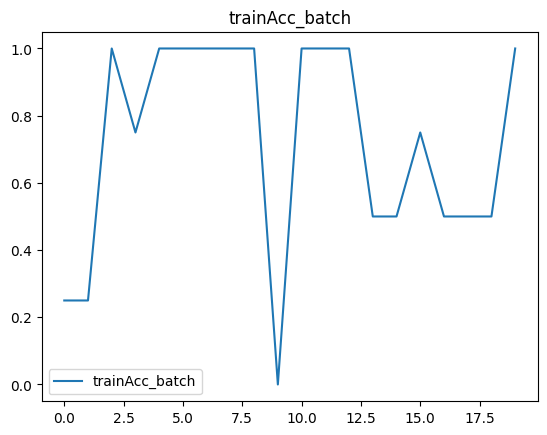

<Figure size 640x480 with 0 Axes>

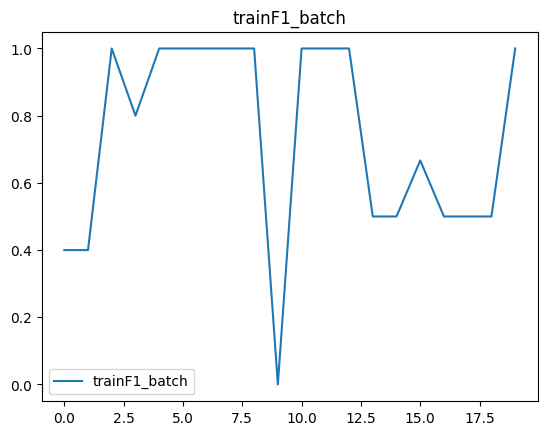

<Figure size 640x480 with 0 Axes>

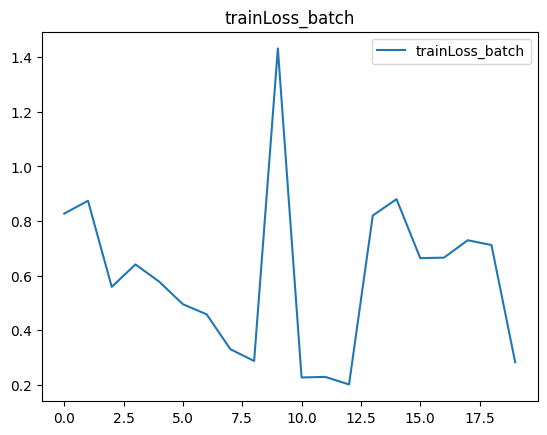

<Figure size 640x480 with 0 Axes>

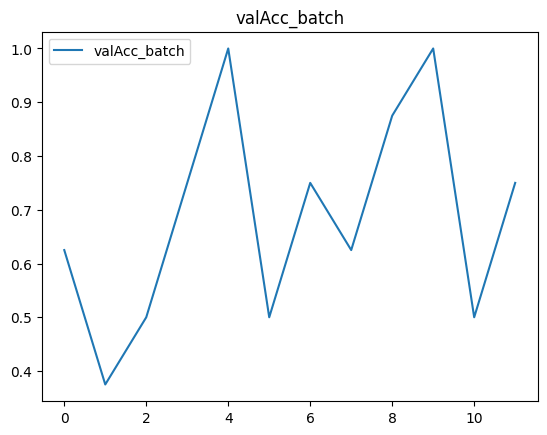

<Figure size 640x480 with 0 Axes>

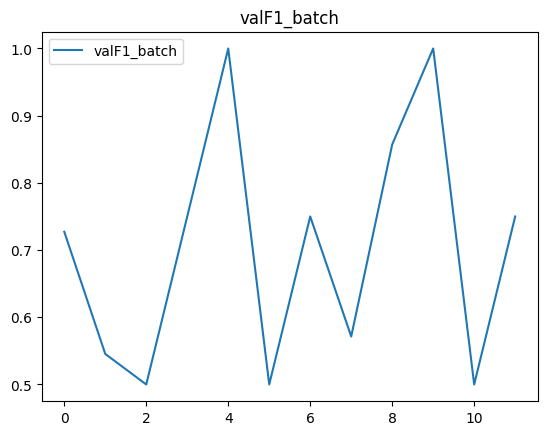

<Figure size 640x480 with 0 Axes>

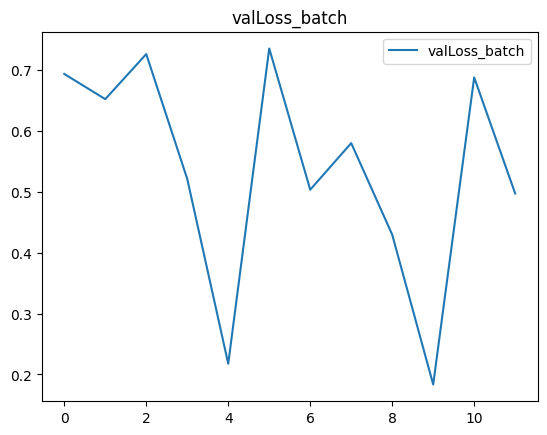

<Figure size 640x480 with 0 Axes>

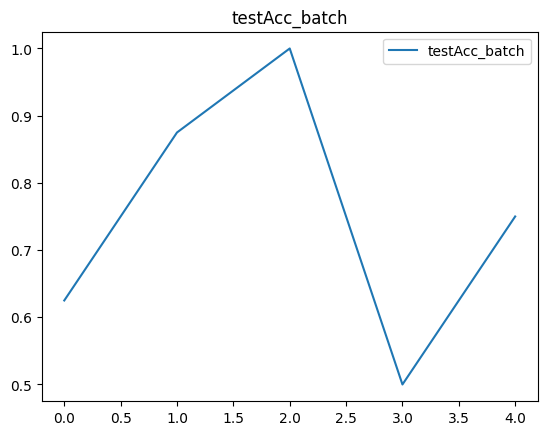

<Figure size 640x480 with 0 Axes>

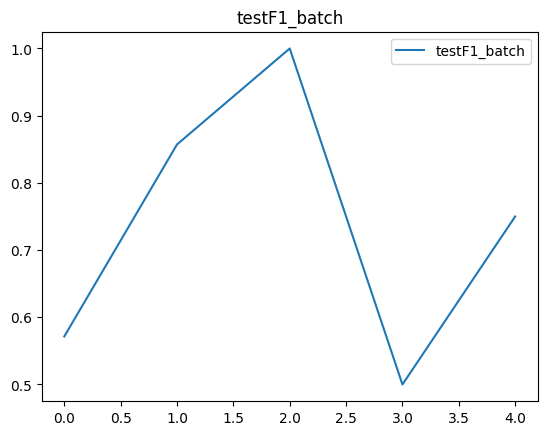

<Figure size 640x480 with 0 Axes>

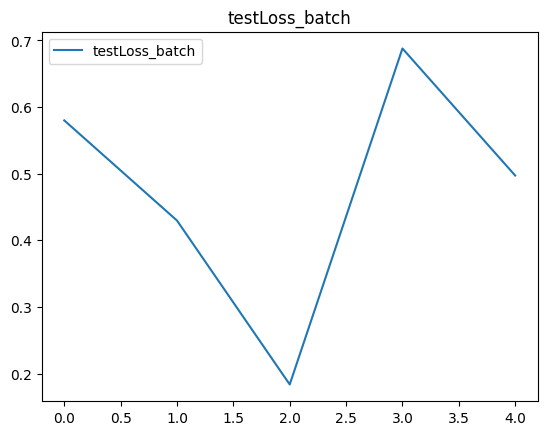

In [175]:
# bart-base-uncased
base_time = 'delete this'
for batch_size in [2]:

    train_and_test_EP(
        model_config=bert_base_config,
        train_and_test_config=train_and_test_config,
        batch_size=batch_size,
        base_time=base_time,
        set_type='base')

# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


# 以下、学習に大きくかかわらないコード

# traienr.py

In [ ]:
import pytorch_lightning as pl
import torch

from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

# from utils import calculate_warmup_steps
# from configuration.config import BaseConfig

# from data_loader.data_reader import read_csv
# from models import NegativeSamplingDataModule, SBERTModel, build_checkpoint_callback

from sklearn.model_selection import train_test_split

from transformers import BertTokenizer

## colab上でのtrainer.pyの実行

In [ ]:
import pytorch_lightning as pl
import torch

from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger

# from utils import calculate_warmup_steps
# from configuration.config import BaseConfig

# from data_loader.data_reader import read_csv
# from models import NegativeSamplingDataModule, SBERTModel, build_checkpoint_callback

from sklearn.model_selection import train_test_split

from transformers import BertTokenizer

In [ ]:
train_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/main/input_train2.tsv'
test_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/main/input_test2.tsv'
val_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/main/input_val2.tsv'

# toy_train_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/toy/toy_input_train2.tsv'
# toy_test_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/toy/toy_input_test2.tsv'
# toy_val_data_path = '/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/data/processed/input_for_lightning_model/toy/toy_input_val2.tsv'

In [ ]:
# CONFIG = BaseConfig_For_Dev(
#     "siamese-bert", # model_name
#     "bert-base-uncased", # language_model_path
#     "bert-base-uncased", # language_model_tokenizer_path
#     1, # save_top_k
#     "/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/src/models", # saved_model_path
#     "/content/drive/MyDrive/B4yoshida/Enhanced Sequence Model with Pytorch Lightning/weights/csv_log", # csv_model_path
#     train_data_path, # train_data_path
#     test_data_path, # test_data_path
#     val_data_path, # val_data_path
#     20, # n_epochs
#     16, # batch_size
#     256, # max_token_count
#     7e-5, # lr
#     42 # randdom_seed
# )
# # なぜかtest, valがtupleになっている
# print(CONFIG.test_data_path)
# print(CONFIG.train_data_path)
# print(type(CONFIG.test_data_path[0]))

In [ ]:

# random_seed = CONFIG.random_seed
# pl.seed_everything(random_seed)

# tokenizer = BertTokenizer.from_pretrained(CONFIG.language_model_tokenizer_path)
# print("tokenizer loaded .... ")
# print("train_data_path : " + CONFIG.train_data_path)
# print("test_data_path : " + CONFIG.test_data_path)
# print("val_data_path : " + CONFIG.val_data_path)

# train_data = read_tsv(CONFIG.train_data_path)
# test_data = read_tsv(CONFIG.test_data_path)
# val_data = read_tsv(CONFIG.val_data_path)

In [ ]:
# train_data[1].value_counts()

In [ ]:
# data_module = LIAR_PLUS_DataModule(
#     CONFIG,
#     train_data,
#     test_data,
#     val_data,
#     tokenizer,
#     batch_size=CONFIG.batch_size)

# total_training_steps, warmup_steps = calculate_warmup_steps(train_data, CONFIG.n_epochs,
#                                                             CONFIG.batch_size)

# print(f"total_training_steps : {total_training_steps} , warmup_steps : {warmup_steps} ")

In [ ]:
# model = SBERTModel(
#     config=CONFIG,
#     n_warmup_steps=warmup_steps,
#     n_training_steps=total_training_steps,
#     n_classes=2
#     )

In [ ]:
# checkpoint_callback = build_checkpoint_callback(CONFIG.save_top_k, CONFIG.saved_model_path)

# import datetime
# t_delta = datetime.timedelta(hours=9)  # 9時間
# JST = datetime.timezone(t_delta, 'JST')  # UTCから9時間差の「JST」タイムゾーン
# dt = datetime.datetime.now(JST)

# print(dt)
# comment = "「 another paper arch」"
# logger = TensorBoardLogger("lightning_logs", name= f"{dt} comment:{comment} n_epochs:{CONFIG.n_epochs} batch_size:{CONFIG.batch_size}")
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15)
# trainer = pl.Trainer(
#     logger=logger,
#     callbacks=[checkpoint_callback, early_stopping_callback],
#     max_epochs=CONFIG.n_epochs)

In [ ]:
# data_module.test_dataloader()

In [ ]:
# trainer.fit(model, datamodule=data_module)

In [ ]:
# trainer.test(dataloaders=data_module.test_dataloader())

# TensorBoardで結果の確認

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir=lightning_logs/

# ランタイムの切断

In [ ]:
from time import sleep
sleep(120)

from google.colab import runtime

runtime.unassign()